In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 




In [2]:
output_path = "csv_output/crime_cnt_df.csv"
national_output_path = "csv_output/national_crime_cnt_df.csv"
#This section is where we gather crime data

ORI_file = "csv_data/ORI.csv"

#import ORI file into a dataframe for analysis.
ORI_df = pd.read_csv(ORI_file, header=None)
ORI_df.head()


,0,1,2,3,4,5,6
0,TX1010000,HARRIS CO SO HOUSTON,SHERIFF'S OFFICE,NaN,NaN,2,HARRIS
1,TX1010100,BAYTOWN PD,BAYTOWN PD,NaN,NaN,3,HARRIS
2,TX101013A,COUNTY ATTORNEY'S OFFICE HOUSTON,COUNTY ATTORNEY'S OFFICE,NaN,NaN,6,HARRIS
3,TX1010200,BELLAIRE PD,BELLAIRE PD,NaN,NaN,3,HARRIS
4,TX1010400,DEER PARK PD,DEER PARK PD,NaN,NaN,3,HARRIS


In [3]:
weather_data_path = "csv_data/HOU_daily.csv"

In [4]:
weather_data_df = pd.read_csv(weather_data_path)
weather_data_df.head()

,Site4,Year,Max Temp,Min Temp,Avg Temp,HDDs,CDDs,Precipitation Water Equiv,Snowfall,Snow/Ice Depth,Full Date
0,HOU,1964,62,28,45.0,20.0,0.0,0.00,0.0,0.0,1/1/64
1,HOU,1964,70,36,53.0,12.0,0.0,0.00,0.0,0.0,1/2/64
2,HOU,1964,72,44,58.0,7.0,0.0,0.06,0.0,0.0,1/3/64
3,HOU,1964,61,50,55.5,9.5,0.0,0.00,0.0,0.0,1/4/64
4,HOU,1964,55,43,49.0,16.0,0.0,0.09,0.0,0.0,1/5/64


In [5]:
income_csv = "csv_data/income.csv"
income_df = pd.read_csv(income_csv)
income_df.head()
    

,year,median_household_income
0,1997,39037
1,1998,40690
2,1999,41466
3,2000,41220
4,2001,43279


In [6]:
# for index, row in ORI_df.iterrows():
#     print(row[0], ' County: ', row[6])

In [7]:
# for row in test:
#     print(test.iloc[row,0])

In [8]:
# API_KEY="7EzFHGuWrZgXizzy1lGkiOxBhNxJZOPrtoxoLca1"
# API_KEY="iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
API_KEY="Ytnm2fOgJYpL3pypEtvXZ1MFpPUxlAyn6BHzqhVW"
#  Only grabbing these items from the CDE API

# these are the crime stat lists.
ORI_list = []
year_list = [1997,1998,1999,2000,2001,2002,2003,
             2004,2005,2006,2007,2008,2009,2010,
             2011,2012,2013,2014,2015,2016,2017]



crime_list = ["aggravated-assault","homicide","robbery","violent-crime"]

agg_assult_actual = []
agg_assult_cleared = []
homicide_actual = []
homicide_cleared = []
rape_actual = []
rape_cleared = []
rape_legacy_actual = []
rape_legacy_cleared = []
robbery_actual = []
robbery_cleared = []
vc_actual = []
vc_cleared = []

#national lists
N_vc = []
N_population = []

# these will be used for the totals on the crime dataframe.  
# They are all in a series. 
# We are setting them to 0 so they can be added to. 
agg_assult_actual_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
agg_assult_cleared_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
homicide_actual_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
homicide_cleared_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
rape_actual_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
rape_cleared_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
rape_legacy_actual_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
rape_legacy_cleared_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
robbery_actual_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
robbery_cleared_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vc_actual_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vc_cleared_cnt = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# pause_counter = 0
# df = ORI_df


        


In [9]:
# This function finds the average for a missing year.  
# If the loop comes across a missing year in the API, 
# it grabs the data for the prior year and the data for the next year and returns and average. 
# But if the API is missing a block of 3 or more years in a row, it will just 0 out that data. 
# You'll be able to see the agency and how much data it is missing below when you run the script. 

def missing_data(crime_var,key_api):
    
#     if apidx != 0 and apidx-1 != 0:
    if crime_data["results"][apidx]["data_year"] != (crime_data["results"][apidx-1]["data_year"])+1:
        crime_var.append((crime_data["results"][apidx][key_api] + crime_data["results"][apidx-1][key_api])/2)
#         print(apidx)
#         print(crime_data["results"][apidx][key_api])
#         print(apidx-1)
#         print(crime_data["results"][apidx-1][key_api])
#         print(crime_var)
    else: 
        crime_var.append(0)
        print(crime_var)

In [10]:
def missing_rape_data():
    
    if rape_data["results"][rpapi]["data_year"] != (rape_data["results"][rpapi-1]["data_year"] + 1)  :
#         if rape_data["results"][rpapi]["offense"] == "rape":
        rape_actual.append((rape_data["results"][rpapi]["actual"] + rape_data["results"][rpapi-2]["actual"])/2)
        rape_cleared.append((rape_data["results"][rpapi]["cleared"] + rape_data["results"][rpapi-2]["cleared"])/2)
#             print(f"1 off 0 rape actual{rape_actual}")
#             print(f"1 off 0 rape cleared{rape_cleared}")

#         if rape_data["results"][rpapi]["offense"] == "rape_legacy":
        rape_legacy_actual.append((rape_data["results"][rpapi]["actual"] + rape_data["results"][rpapi-2]["actual"])/2)
        rape_legacy_cleared.append((rape_data["results"][rpapi]["cleared"] + rape_data["results"][rpapi-2]["cleared"])/2)
#             print(f"1 off 0 rape legacy actual{rape_legacy_actual}")
#             print(f"1 off 0 rape legacy cleared{rape_legacy_cleared}")
        
            
    else: 
#         if rape_data["results"][rpapi]["offense"] == "rape":
        rape_actual.append(0)
        rape_cleared.append(0)
#             print(f"missing rape actual{rape_actual}")
#             print(f"missing rape cleared{rape_cleared}")
#         if rape_data["results"][rpapi]["offense"] == "rape_legacy":
        rape_legacy_actual.append(0)
        rape_legacy_cleared.append(0)
#             print(f"misisng rape legacy actual{rape_legacy_actual}")
#             print(f"missing rape legacy cleared{rape_legacy_cleared}")
        

In [11]:
ORI_list = ORI_df[0].to_list()


In [12]:
#URL call for estimated national violent crime data using a public API key.
national_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/national/1997/2017?API_KEY=lAhbHilA6cmNxP2IHrRlsSVZvFETZf4iczTN20GI"
national_crime_data = requests.get(national_url).json()

 #gather national data
nidx = 0    
for x in year_list:
    N_vc.append(national_crime_data["results"][nidx]["violent_crime"])
    N_population.append(national_crime_data["results"][nidx]["population"])

    nidx+=1


In [13]:
national_crime_cnt_df = pd.DataFrame({"Year":year_list,
                             "Violent Crime":N_vc,
                             "Population":N_population
                             
                            }) 


national_crime_cnt_df

,Year,Violent Crime,Population
0,1997,1636099,267783607
1,1998,1533887,270248003
2,1999,1426044,272690813
3,2000,1425486,281421906
4,2001,1439480,285317559
5,2002,1423677,287973924
6,2003,1383676,290788976
7,2004,1360088,293656842
8,2005,1390745,296507061
9,2006,1435123,299398484


In [14]:
# Because we are loopign through a dataframe (ORI_df), we need to use an iterrows loop.
# A basic for loop makes it count by columns instead of by rows. 
# https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/
ORIdx = 0

for ORI_name in ORI_list:
    
    cridx = 0
    for crime in crime_list:
        
# URL calls using a public API Key (iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv).   
        crime_url = "https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/"
        query_url = f"{crime_url}{ORI_list[ORIdx]}/{crime_list[cridx]}/1997/2017?API_KEY={API_KEY}"
        crime_data = requests.get(query_url).json()
        
        print(ORI_list[ORIdx]) 
        print(crime_list[cridx])
        
        # Counters
        apidx = 0       #APi InDeX - this is for each dictionary in the API
        yridx = 0       #YeaR InDeX - this is for the contents of the year[list] up above.  It will be used to test if the year exists in the API.
        
        
        
        # Try the section below unless you get a KeyError:
        # If we get a KeyError, it is because the page doesn't exist. Display the ORI as failed, and move on to the next one. 
        try:       
        
            # Loop through the APIs using the year_list[].  
            # First test to make sure the Year data exists.  
            # If it doesn't 0 out that part of the list. 
            for dates in year_list:

                # Next try testing to see if there year in year_list[] matches with the year in the API.  
                # If it does, then grab the data and append the lists. 
                # If it doesn't, run the missing data function to see we can get an average for the missing year. 
                # If we get an IndexError, it is because the API doesn't have as many years as year_list[] 
                # the API ended too soon and so the index doesn't match up with year_list[]
                # zero it out for that missing year and move on. 
#                 try:
                if year_list[yridx] == crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "aggravated-assault":

                    # print(crime_data["results"][apidx]["data_year"]) # This is just for testing.
                    agg_assult_actual.append(crime_data["results"][apidx]["actual"])
                    agg_assult_cleared.append(crime_data["results"][apidx]["cleared"])
                    apidx += 1
                    yridx += 1

                elif year_list[yridx] != crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "aggravated-assault":
                    missing_data(agg_assult_actual,"actual")
                    missing_data(agg_assult_cleared,"cleared")
                    yridx +=1

                elif year_list[yridx] == crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "homicide":
                    homicide_actual.append(crime_data["results"][apidx]["actual"])
                    homicide_cleared.append(crime_data["results"][apidx]["cleared"])
                    apidx += 1
                    yridx += 1

                elif year_list[yridx] != crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "homicide":
                    missing_data(homicide_actual,"actual")
                    missing_data(homicide_cleared,"cleared")
                    yridx +=1

#                 

                

                elif year_list[yridx] == crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "robbery":
                    robbery_actual.append(crime_data["results"][apidx]["actual"])
                    robbery_cleared.append(crime_data["results"][apidx]["cleared"])
                    apidx += 1
                    yridx += 1

                elif year_list[yridx] != crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "robbery":
                    missing_data(robbery_actual,"actual")
                    missing_data(robbery_cleared,"cleared")
                    yridx +=1

                elif year_list[yridx] == crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "violent-crime":
                    vc_actual.append(crime_data["results"][apidx]["actual"])
                    vc_cleared.append(crime_data["results"][apidx]["cleared"])
                    apidx += 1
                    yridx += 1

                elif year_list[yridx] != crime_data["results"][apidx]["data_year"] and crime_list[cridx] == "violent-crime":
                    missing_data(vc_actual,"actual")
                    missing_data(vc_cleared,"cleared")
                    yridx +=1

            if crime_list[cridx] == "aggravated-assault":
                # turn the list into a series
                agg_assult_actual_sr = pd.Series(agg_assult_actual)

                # add the series contents into the count dataframe
                agg_assult_actual_cnt = agg_assult_actual_cnt + agg_assult_actual_sr
                round(agg_assult_actual_cnt)

                # empty out the list so it can be refilled when it loops to the next API. 
                del agg_assult_actual[:]
                

                agg_assult_cleared_sr = pd.Series(agg_assult_cleared) 
                agg_assult_cleared_cnt = agg_assult_cleared_cnt + agg_assult_cleared_sr
                round(agg_assult_cleared_cnt)
                del agg_assult_cleared[:]
                
            
            elif crime_list[cridx] == "homicide":
                homicide_actual_sr = pd.Series(homicide_actual)  
                homicide_actual_cnt = homicide_actual_cnt + homicide_actual_sr
                round(homicide_actual_cnt)
                del homicide_actual[:]
                

                homicide_cleared_sr = pd.Series(homicide_cleared)  
                homicide_cleared_cnt = homicide_cleared_cnt + homicide_cleared_sr
                round(homicide_cleared_cnt)
                del homicide_cleared[:]

#             
            
            elif crime_list[cridx] == "robbery":
                robbery_actual_sr = pd.Series(robbery_actual)  
                robbery_actual_cnt = robbery_actual_cnt + robbery_actual_sr
                round(robbery_actual_cnt)
                del robbery_actual[:]

                robbery_cleared_sr = pd.Series(robbery_cleared)  
                robbery_cleared_cnt = robbery_cleared_cnt + robbery_cleared_sr
                round(robbery_cleared_cnt)
                del robbery_cleared[:]

            elif crime_list[cridx] == "violent-crime":    
                vc_actual_sr = pd.Series(vc_actual)  
                vc_actual_cnt = vc_actual_cnt + vc_actual_sr
                round(vc_actual_cnt)
                del vc_actual[:]

                vc_cleared_sr = pd.Series(vc_cleared)  
                vc_cleared_cnt = vc_cleared_cnt + vc_cleared_sr
                round(vc_cleared_cnt)
                del vc_cleared[:]
            
            cridx+=1
            
            
        except KeyError:
            print(f"exception: {ORI_list[ORIdx]} - No Data")
            
    
    
    ORIdx+=1
            


TX1010000
aggravated-assault
TX1010000
homicide
TX1010000
robbery
TX1010000
violent-crime
TX1010100
aggravated-assault
TX1010100
homicide
TX1010100
robbery
TX1010100
violent-crime
TX101013A
aggravated-assault
exception: TX101013A - No Data
TX101013A
aggravated-assault
exception: TX101013A - No Data
TX101013A
aggravated-assault
exception: TX101013A - No Data
TX101013A
aggravated-assault
exception: TX101013A - No Data
TX1010200
aggravated-assault
TX1010200
homicide
TX1010200
robbery
TX1010200
violent-crime
TX1010400
aggravated-assault
TX1010400
homicide
TX1010400
robbery
TX1010400
violent-crime
TX1010600
aggravated-assault
TX1010600
homicide
TX1010600
robbery
TX1010600
violent-crime
TX1010900
aggravated-assault
TX1010900
homicide
TX1010900
robbery
TX1010900
violent-crime
TX1011100
aggravated-assault
TX1011100
homicide
TX1011100
robbery
TX1011100
violent-crime
TX1011200
aggravated-assault
TX1011200
homicide
TX1011200
robbery
TX1011200
violent-crime
TX1011300
aggravated-assault
TX1011300
h

In [35]:



rORIdx = 0        
for name in ORI_list:
    rp_crime_url = "https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/"
    rp_query_url = f"{rp_crime_url}{ORI_list[rORIdx]}/rape/1997/2017?API_KEY=MVJerFc1bWBZR47GETLxWt7sdCwrcQlPFdb2ktL2"
    rape_data = requests.get(rp_query_url).json()
    
        
    
    try:
        rpyr = 0
        rpapi = 0
        print(ORI_list[rORIdx]) 
        
        for yrs in year_list:
            if year_list[rpyr] == rape_data["results"][rpapi]["data_year"]: 
                if rape_data["results"][rpapi]["offense"] == "rape":
                    rape_actual.append(rape_data["results"][rpapi]["actual"])
                    rape_cleared.append(rape_data["results"][rpapi]["cleared"])
#                     print(f"rape actual{rape_actual}")
#                     print(f"rape cleared{rape_cleared}")
                    rpapi += 1
        
                    
                if rape_data["results"][rpapi]["offense"] == "rape-legacy":
                    rape_legacy_actual.append(rape_data["results"][rpapi]["actual"])
                    rape_legacy_cleared.append(rape_data["results"][rpapi]["cleared"])
#                     print(f"rape legacy actual{rape_legacy_actual}")
#                     print(f"rape legacy cleared{rape_legacy_cleared}")
            
                    rpyr += 1
                    rpapi += 1
            
               
               
            elif year_list[rpyr] != rape_data["results"][rpapi]["data_year"]:
                if rape_data["results"][rpapi]["offense"] == "rape":
                    missing_rape_data()
                    

                if rape_data["results"][rpapi]["offense"] == "rape-legacy":
                    missing_rape_data()
                    rpyr += 1
                    


        
        rape_actual_sr = pd.Series(rape_actual)  
        rape_actual_cnt = rape_actual_cnt + rape_actual_sr
        round(rape_actual_cnt,0)
        print(rape_actual_cnt)
        del rape_actual[:]
        

        rape_cleared_sr = pd.Series(rape_cleared)  
        rape_cleared_cnt = rape_cleared_cnt + rape_cleared_sr
        round(rape_cleared_cnt,0)
        print(rape_cleared_cnt)
        del rape_cleared[:]

        rape_legacy_actual_sr = pd.Series(rape_legacy_actual) 
        rape_legacy_actual_cnt = rape_legacy_actual_cnt + rape_legacy_actual_sr
        round(rape_legacy_actual_cnt,0)
        print(rape_legacy_actual_cnt)
        del rape_legacy_actual[:]


        rape_legacy_cleared_sr = pd.Series(rape_legacy_cleared)  
        rape_legacy_cleared_cnt = rape_legacy_cleared_cnt + rape_legacy_cleared_sr
        round(rape_legacy_cleared_cnt,0)
        print(rape_legacy_cleared_cnt)
        del rape_legacy_cleared[:]
    
    
    except KeyError:
            print(f"exception: {ORI_list[rORIdx]} - No Rape Data")
    
    rORIdx+=1
    
print('Completed API calls')

TX1010000
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17    433
18    454
19    537
20    533
dtype: int64
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17    43
18    52
19    71
20    76
dtype: int64
0     274
1     315
2     283
3     303
4     301
5     297
6     344
7     370
8     327
9     338
10    354
11    351
12    281
13    212
14    335
15    295
16    281
17      0
18      0
19      0
20      0
dtype: int64
0     145
1     141
2     117
3     114
4     114
5     135
6     139
7     129
8     121
9     119
10    101
11    146
12     54
13     32
14     74
15     52
16     43
17      0
18      0
19      0
20      0
dtype: int64
TX1010100
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0

TX1011700
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17    622
18    637
19    722
20    743
dtype: int64
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17    102
18    167
19    178
20    185
dtype: int64
0     403
1     423
2     406
3     402
4     427
5     449
6     464
7     517
8     456
9     467
10    506
11    487
12    410
13    350
14    473
15    436
16    397
17      0
18      0
19      0
20      0
dtype: int64
0     228
1     190
2     192
3     172
4     187
5     216
6     197
7     195
8     180
9     194
10    188
11    224
12    127
13    120
14    156
15    120
16    100
17      0
18      0
19      0
20      0
dtype: int64
TX1011800
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7   

TX1012600
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      5.0
17    643.0
18    653.0
19    752.0
20    771.0
dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      3.0
17    111.0
18    172.0
19    187.0
20    196.0
dtype: float64
0     411.0
1     437.0
2     414.0
3     412.0
4     435.0
5     462.0
6     492.0
7     550.0
8     490.0
9     498.0
10    522.0
11    512.0
12    424.0
13    373.0
14    496.0
15    466.0
16    411.0
17      0.0
18      0.0
19      0.0
20      0.0
dtype: float64
0     230.0
1     199.0
2     199.0
3     180.0
4     189.0
5     225.0
6     213.0
7     209.0
8     198.0
9     213.0
10    198.0
11    235.0
12    133.0
13    131.0
14    172.0
15    144

TX1014100
0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
6       2.0
7       2.0
8       2.0
9       2.0
10      2.0
11      2.0
12      2.0
13      2.0
14      2.0
15      2.0
16     14.0
17    671.0
18    684.0
19    766.0
20    805.0
dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      5.0
17    119.0
18    178.0
19    194.0
20    206.0
dtype: float64
0     418.0
1     442.0
2     424.0
3     420.0
4     445.0
5     474.0
6     501.0
7     555.0
8     498.0
9     508.0
10    531.0
11    520.0
12    431.0
13    380.0
14    504.0
15    476.0
16    424.0
17      2.0
18      2.0
19      2.0
20      2.0
dtype: float64
0     233.0
1     202.0
2     202.0
3     185.0
4     193.0
5     228.0
6     216.0
7     211.0
8     202.0
9     217.0
10    202.0
11    240.0
12    138.0
13    135.0
14    175.0
15    150

TX1016700
0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
6       2.0
7       2.0
8       2.0
9       2.0
10      2.0
11      2.0
12      2.0
13      2.0
14      2.0
15      2.0
16     14.0
17    676.0
18    685.0
19    786.0
20    812.0
dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      5.0
17    119.0
18    178.0
19    201.0
20    207.0
dtype: float64
0     419.0
1     443.0
2     424.0
3     422.0
4     448.0
5     478.0
6     505.0
7     562.0
8     501.0
9     519.0
10    536.0
11    525.0
12    441.0
13    384.0
14    507.0
15    480.0
16    428.0
17      2.0
18      2.0
19      2.0
20      2.0
dtype: float64
0     233.0
1     202.0
2     202.0
3     186.0
4     196.0
5     231.0
6     219.0
7     215.0
8     206.0
9     217.0
10    202.0
11    241.0
12    138.0
13    135.0
14    175.0
15    151

In [16]:
crime_cnt_df = pd.DataFrame({"Year":year_list,
                             "Aggravated Assault Actual":agg_assult_actual_cnt,
                             "Aggravated Assault Cleared":agg_assult_cleared_cnt,
                             "Homicide Actual":homicide_actual_cnt,
                             "Homicide Cleared":homicide_cleared_cnt,
                             "Rape Actual":rape_actual_cnt,
                             "Rape Cleared":rape_cleared_cnt,
                             "Rape Legacy Actual":rape_legacy_actual_cnt,
                             "Rape Legacy Cleared":rape_legacy_cleared_cnt,
                             "Robbery Actual":robbery_actual_cnt,
                             "Robbery Cleared":robbery_cleared_cnt,
                             "Violent Crime Actual":vc_actual_cnt,
                             "Violent Crime Cleared":vc_cleared_cnt
                             
                            }) 

# crime_cnt_df["Total"] = crime_cnt_df.iloc[:, 1:8].sum(axis = 1)


# US definition of violent crime is:  Aggravated and Simple Assault, Rape, and Robbery. 
# Murder and Manslaughter are counted seperately. 
# Human Trafficing, Animal Cruelty, etc. are in another catagory as well. 
# crime_cnt_df["US Defined Total"] = crime_cnt_df.iloc[:,1:5].sum(axis = 1)
crime_cnt_df["Estimated National Violent Crime Total"] = national_crime_cnt_df["Violent Crime"]

crime_cnt_df

,Year,Aggravated Assault Actual,Aggravated Assault Cleared,Homicide Actual,Homicide Cleared,Rape Actual,Rape Cleared,Rape Legacy Actual,Rape Legacy Cleared,Robbery Actual,Robbery Cleared,Violent Crime Actual,Violent Crime Cleared,Estimated National Violent Crime Total
0,1997,17437.0,8920.0,334.0,237.0,2.5,1.0,1211.5,603.0,9903.5,2428.5,28886.0,12188.5,1636099
1,1998,16502.0,7407.0,322.0,228.0,2.5,1.0,1098.5,533.0,9221.5,2508.5,27144.0,10676.5,1533887
2,1999,16400.0,8548.0,294.0,197.0,2.5,1.0,1172.5,589.0,9951.5,2682.5,27818.0,12016.5,1426044
3,2000,16364.0,8276.0,290.0,204.0,2.5,1.0,1237.5,556.0,9761.5,2417.5,27653.0,11453.5,1425486
4,2001,17080.5,8164.5,322.0,219.0,2.5,1.0,1394.5,521.0,11709.0,2596.0,30506.0,11500.5,1439480
5,2002,17744.5,8095.5,340.0,230.0,2.5,1.0,1373.5,545.0,13472.0,3070.0,32930.0,11940.5,1423677
6,2003,17488.5,7924.5,342.0,212.0,2.5,1.0,1276.5,464.0,13339.0,2935.0,32446.0,11535.5,1383676
7,2004,17891.0,7735.0,351.0,211.0,2.5,1.0,1473.5,488.0,12602.0,2986.0,32318.0,11420.0,1360088
8,2005,17467.0,7369.0,416.0,247.0,2.5,1.0,1378.5,450.0,13574.0,2501.0,32835.0,10567.0,1390745
9,2006,17855.0,7785.0,461.0,322.0,2.5,1.0,1378.5,461.0,14206.0,2867.0,33900.0,11435.0,1435123


In [36]:
avg_temps=[]
min_temps=[]
max_temps=[]
weather_sum={}
#Initializing variables to hold calculated or filtered data for each year to be appended to lists
avg_temp=0
min_temp=0
max_temp=0
#variable to hold value of year
year=1997
#filter rows for each year using  the boolean expression
for year in range(1997,2018):
    new_df=weather_data_df[weather_data_df['Year']==year]
    avg_temp=new_df['Avg Temp'].mean()
    min_temp=new_df['Min Temp'].min()
    max_temp=new_df['Max Temp'].max()
    avg_temps.append(avg_temp)
    min_temps.append(min_temp)
    max_temps.append(max_temp)
    year+=1
print(avg_temps)
print(min_temps)
print(max_temps)

[69.3945205479452, 72.37397260273973, 71.65205479452055, 71.14207650273224, 69.96712328767123, 69.97534246575343, 69.96027397260274, 70.95218579234972, 71.45205479452055, 71.46164383561644, 71.04657534246576, 71.17896174863388, 71.15342465753425, 69.83287671232877, 72.45205479452055, 72.59972677595628, 70.36301369863014, 69.5986301369863, 71.33972602739726, 72.90573770491804, 73.2931506849315]
[30, 29, 29, 30, 29, 25, 28, 28, 34, 30, 29, -1, 27, 21, 23, 31, 31, 25, 30, 32, 23]
[98, 102, 101, 108, 97, 97, 102, 97, 100, 99, 102, 104, 103, 99, 105, 102, 105, 98, 104, 99, 102]


In [37]:
avg_temps = [round(t,2) for t in avg_temps]
crime_cnt_df["Average Temperature"] = avg_temps
crime_cnt_df["Minimum Temperature"] = min_temps
crime_cnt_df["Maximum Temperature"] = max_temps

In [38]:
crime_cnt_df["Household Median Income"] = income_df["median_household_income"]


In [39]:
# crime_cnt_df["Year"].astype(str)
crime_cnt_df

,Year,Aggravated Assault Actual,Aggravated Assault Cleared,Homicide Actual,Homicide Cleared,Rape Actual,Rape Cleared,Rape Legacy Actual,Rape Legacy Cleared,Robbery Actual,Robbery Cleared,Violent Crime Actual,Violent Crime Cleared,Estimated National Violent Crime Total,Average Temperature,Minimum Temperature,Maximum Temperature,Household Median Income
0,1997,17437.0,8920.0,334.0,237.0,2.5,1.0,1211.5,603.0,9903.5,2428.5,28886.0,12188.5,1636099,69.39,30,98,39037
1,1998,16502.0,7407.0,322.0,228.0,2.5,1.0,1098.5,533.0,9221.5,2508.5,27144.0,10676.5,1533887,72.37,29,102,40690
2,1999,16400.0,8548.0,294.0,197.0,2.5,1.0,1172.5,589.0,9951.5,2682.5,27818.0,12016.5,1426044,71.65,29,101,41466
3,2000,16364.0,8276.0,290.0,204.0,2.5,1.0,1237.5,556.0,9761.5,2417.5,27653.0,11453.5,1425486,71.14,30,108,41220
4,2001,17080.5,8164.5,322.0,219.0,2.5,1.0,1394.5,521.0,11709.0,2596.0,30506.0,11500.5,1439480,69.97,29,97,43279
5,2002,17744.5,8095.5,340.0,230.0,2.5,1.0,1373.5,545.0,13472.0,3070.0,32930.0,11940.5,1423677,69.98,25,97,42704
6,2003,17488.5,7924.5,342.0,212.0,2.5,1.0,1276.5,464.0,13339.0,2935.0,32446.0,11535.5,1383676,69.96,28,102,42262
7,2004,17891.0,7735.0,351.0,211.0,2.5,1.0,1473.5,488.0,12602.0,2986.0,32318.0,11420.0,1360088,70.95,28,97,41922
8,2005,17467.0,7369.0,416.0,247.0,2.5,1.0,1378.5,450.0,13574.0,2501.0,32835.0,10567.0,1390745,71.45,34,100,44085
9,2006,17855.0,7785.0,461.0,322.0,2.5,1.0,1378.5,461.0,14206.0,2867.0,33900.0,11435.0,1435123,71.46,30,99,47159


In [40]:
crime_cnt_df.to_csv(output_path, index=False)
national_crime_cnt_df.to_csv(national_output_path, index = False)

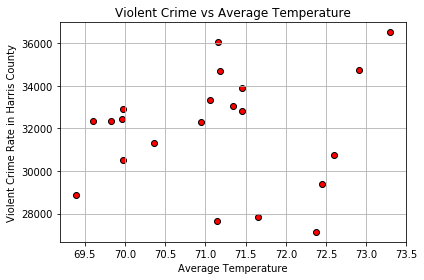

In [41]:
crime_avg_temp_plt = plt.scatter(x=crime_cnt_df["Average Temperature"], 
                           y=crime_cnt_df["Violent Crime Actual"], 
#                            s=crime_cnt_df["Total"]/10, 
                           color="red", 
                           edgecolor = "black") 
#                            alpha = .5, 
#                            label = "Crime Total")

plt.title("Violent Crime vs Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Violent Crime Rate in Harris County")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_total_avg_temp.png", bbox_inches = "tight")
plt.show()



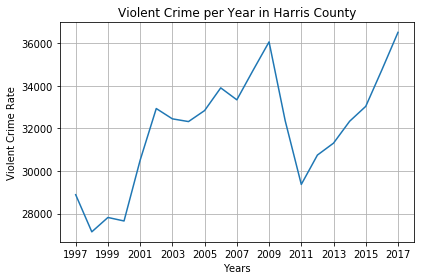

In [42]:
x_axis = [1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]

plt.plot(crime_cnt_df["Year"], crime_cnt_df["Violent Crime Actual"]) 

plt.xticks(x_axis)                                          
plt.title("Violent Crime per Year in Harris County")
plt.xlabel("Years")
plt.ylabel("Violent Crime Rate")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_total_per_year.png", bbox_inches = "tight")
plt.show()

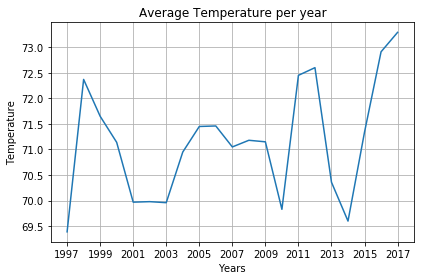

In [43]:
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Average Temperature"]) 

plt.xticks(x_axis)                                          
plt.title("Average Temperature per year")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/average_temp_per_year.png", bbox_inches = "tight")
plt.show()

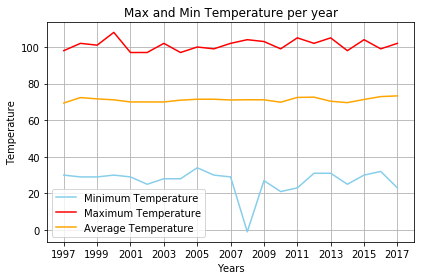

In [44]:
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Minimum Temperature"], color = "skyblue")
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Maximum Temperature"], color = "red")
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Average Temperature"], color = "orange")
plt.legend()
plt.xticks(x_axis)                                          
plt.title("Max and Min Temperature per year")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/max_and_min_temp_per_year.png", bbox_inches = "tight")
plt.show()

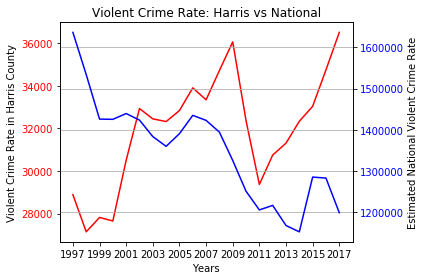

In [45]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('Violent Crime Rate in Harris County')
ax1.plot(crime_cnt_df["Year"], crime_cnt_df["Violent Crime Actual"], color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Estimated National Violent Crime Rate')  # we already handled the x-label with ax1
ax2.plot(crime_cnt_df["Year"], crime_cnt_df["Estimated National Violent Crime Total"], color="blue")
ax2.tick_params(axis='y', labelcolor="blue")


plt.xticks(x_axis)                                          
plt.title("Violent Crime Rate: Harris vs National")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_harris_vs_national.png", bbox_inches = "tight")
plt.show()

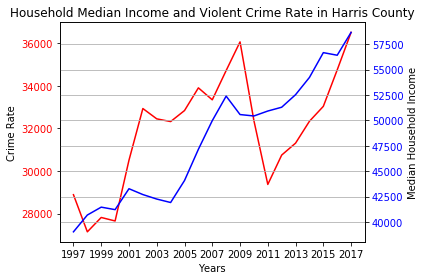

In [46]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('Crime Rate')
ax1.plot(crime_cnt_df["Year"], crime_cnt_df["Violent Crime Actual"], color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Median Household Income')  # we already handled the x-label with ax1
ax2.plot(crime_cnt_df["Year"], crime_cnt_df["Household Median Income"], color="blue")
ax2.tick_params(axis='y', labelcolor="blue")


plt.xticks(x_axis)                                          
plt.title("Household Median Income and Violent Crime Rate in Harris County")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/income_vs_crime_per_year.png", bbox_inches = "tight")
plt.show()

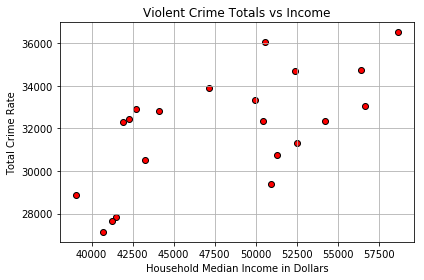

In [47]:
crime_vs_income_plt = plt.scatter(x=crime_cnt_df["Household Median Income"], 
                                  y=crime_cnt_df["Violent Crime Actual"], 
                                  color="red", 
                                  edgecolor = "black") 

plt.title("Violent Crime Totals vs Income")
plt.xlabel("Household Median Income in Dollars")
plt.ylabel("Total Crime Rate")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_vs_income.png", bbox_inches = "tight")
plt.show()
